In [1]:
import keras
keras.__version__
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

Using TensorFlow backend.


In [2]:
original_dataset_dir = '/home/matteolab/Documents/TesiMagistrale/MODELLI/CLASSIFICAZIONE_PET_CT_MRI_DATA/dati_elisabetta_jpg'
base_dir = '/home/matteolab/Documents/TesiMagistrale/MODELLI/CLASSIFICAZIONE_PET_CT_MRI_DATA/DL'
try: 
    os.mkdir(base_dir)
except:
    pass

train_dir = os.path.join(base_dir, 'train')
try: 
    os.mkdir(train_dir)
except:
    pass
validation_dir = os.path.join(base_dir, 'validation')
try: 
    os.mkdir(validation_dir)
except:
    pass
test_dir = os.path.join(base_dir, 'test')
try: 
    os.mkdir(test_dir)
except:
    pass

train_CT_dir = os.path.join(train_dir, 'CT')
try: 
    os.mkdir(train_CT_dir)
except:
    pass
train_PET_dir = os.path.join(train_dir, 'PET')
try: 
    os.mkdir(train_PET_dir)
except:
    pass
train_MRI_dir = os.path.join(train_dir, 'MRI')
try: 
    os.mkdir(train_MRI_dir)
except:
    pass

validation_CT_dir = os.path.join(validation_dir, 'CT')
try: 
    os.mkdir(validation_CT_dir)
except:
    pass
validation_PET_dir = os.path.join(validation_dir, 'PET')
try: 
    os.mkdir(validation_PET_dir)
except:
    pass
validation_MRI_dir = os.path.join(validation_dir, 'MRI')
try: 
    os.mkdir(validation_MRI_dir)
except:
    pass

test_CT_dir = os.path.join(test_dir, 'CT')
try: 
    os.mkdir(test_CT_dir)
except:
    pass
test_PET_dir = os.path.join(test_dir, 'PET')
try: 
    os.mkdir(test_PET_dir)
except:
    pass
test_MRI_dir = os.path.join(test_dir, 'MRI')
try: 
    os.mkdir(test_MRI_dir)
except:
    pass

In [3]:
fnames = ['CT{}.jpg'.format(i) for i in range(1,101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_CT_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['PET{}.jpg'.format(i) for i in range(1,101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_PET_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['MRI{}.jpg'.format(i) for i in range(1,51)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_MRI_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
fnames = ['CT{}.jpg'.format(i) for i in range(102, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_CT_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['PET{}.jpg'.format(i) for i in range(102, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_PET_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['MRI{}.jpg'.format(i) for i in range(52, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_MRI_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
fnames = ['CT{}.jpg'.format(i) for i in range(203, 259)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_CT_dir, fname)
    shutil.copyfile(src, dst)
                                        
fnames = ['PET{}.jpg'.format(i) for i in range(203, 263)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_PET_dir, fname)
    shutil.copyfile(src, dst)
                                         
fnames = ['MRI{}.jpg'.format(i) for i in range(102, 120)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_MRI_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training CT images:', len(os.listdir(train_CT_dir)))
print('total training PET images:', len(os.listdir(train_PET_dir)))
print('total training MRI images:', len(os.listdir(train_MRI_dir)))
print('>')
print('total validation CT images:', len(os.listdir(validation_CT_dir)))
print('total validation PET images:', len(os.listdir(validation_PET_dir)))
print('total validation MRI images:', len(os.listdir(validation_MRI_dir)))
print('>')
print('total test CT images:', len(os.listdir(test_CT_dir)))
print('total test PET images:', len(os.listdir(test_PET_dir)))
print('total test MRI images:', len(os.listdir(test_MRI_dir)))

total training CT images: 100
total training PET images: 100
total training MRI images: 50
>
total validation CT images: 100
total validation PET images: 100
total validation MRI images: 50
>
total test CT images: 57
total test PET images: 61
total test MRI images: 18


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
__________

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
# DEVONO ESSERE IN FORMATO JPG
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=10,
        class_mode='categorical') #?

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        batch_size=10,
        class_mode='categorical') #?

Found 250 images belonging to 3 classes.
Found 250 images belonging to 3 classes.


In [11]:
train_generator.class_indices #sono i nomi delle cartelle

{'CT': 0, 'MRI': 1, 'PET': 2}

In [12]:
train_generator.shuffle

True

In [13]:
train_generator.class_mode

'categorical'

In [14]:
#train_generator.filenames

In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 256, 256, 3)
labels batch shape: (10, 3)


In [16]:
labels_batch

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=30)

Epoch 1/5
30/30 [==============================] - 10s 330ms/step - loss: 0.4254 - acc: 0.7933 - val_loss: 0.5586 - val_acc: 0.8880
Epoch 2/5
30/30 [==============================] - 6s 212ms/step - loss: 0.0769 - acc: 0.9800 - val_loss: 0.3366 - val_acc: 0.9160
Epoch 3/5
30/30 [==============================] - 6s 201ms/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.2889 - val_acc: 0.9240
Epoch 4/5
30/30 [==============================] - 7s 232ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6682 - val_acc: 0.9120
Epoch 5/5
30/30 [==============================] - 6s 188ms/step - loss: 1.6302e-04 - acc: 1.0000 - val_loss: 0.6152 - val_acc: 0.9200


In [18]:
model.save('model_first.h5')

In [ ]:
image_datasCT=[]
plt.clf()
for n in range(1,len(os.listdir(train_CT_dir))):
    n=str(n)
    img = mpimg.imread(train_CT_dir+'/CT'+n+'.jpg')
    #img_flat = img[:,:,0]
    #plt.imshow(img, cmap='binary')
    #plt.show()
    image_datasCT.append(img)
x=np.asanyarray(image_datasCT)
x.shape
    
fig = plt.figure(figsize=(100,100)) 

for i in range(len(os.listdir(train_CT_dir))-1):
    sub = fig.add_subplot(round(len(os.listdir(train_CT_dir)))/10, round(len(os.listdir(train_CT_dir)))/10, i + 1)
    sub.imshow(x[i,:,:], cmap='binary')

In [ ]:
image_datasMRI=[]
plt.clf()
for n in range(1,len(os.listdir(train_MRI_dir))):
    n=str(n)
    img = mpimg.imread(train_MRI_dir+'/MRI'+n+'.jpg')
    #img_flat = img[:,:,0]
    #plt.imshow(img, cmap='binary')
    #plt.show()
    image_datasMRI.append(img)
x=np.asanyarray(image_datasMRI)
x.shape
    
fig = plt.figure(figsize=(100,100))  

for i in range(49):
    sub = fig.add_subplot(round(len(os.listdir(train_PET_dir)))/10, round(len(os.listdir(train_PET_dir)))/10, i + 1)
    sub.imshow(x[i,:,:], cmap='binary')

In [ ]:
image_datasPET=[]
plt.clf()
for n in range(1,len(os.listdir(train_PET_dir))):
    n=str(n)
    img = mpimg.imread(train_PET_dir+'/PET'+n+'.jpg')
    #img_flat = img[:,:,0]
    #plt.imshow(img, cmap='binary')
    #plt.show()
    image_datasPET.append(img)
x=np.asanyarray(image_datasPET)
x.shape
    
fig = plt.figure(figsize=(100,100))  

for i in range(49):
    sub = fig.add_subplot(round(len(os.listdir(train_PET_dir)))/10, round(len(os.listdir(train_PET_dir)))/10, i + 1)
    sub.imshow(x[i,:,:], cmap='binary')

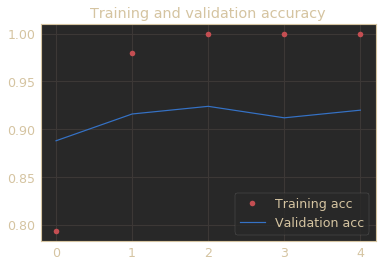

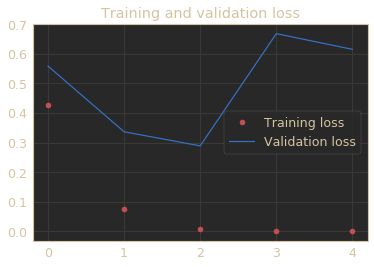

In [19]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', color='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', color='r', label='Training loss')
plt.plot(epochs, val_loss,  'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=10,
    class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=30)
print('TEST LOSS: ', test_loss)
print('TEST_ACCURACY: ', test_acc)

Found 136 images belonging to 3 classes.
TEST LOSS:  0.36764010329083346
TEST_ACCURACY:  0.9383561582597968


In [21]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

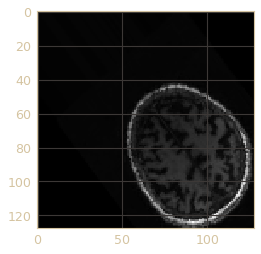

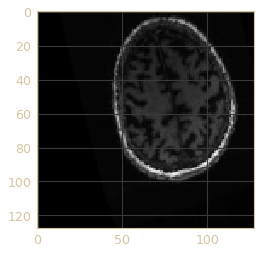

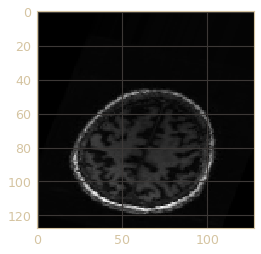

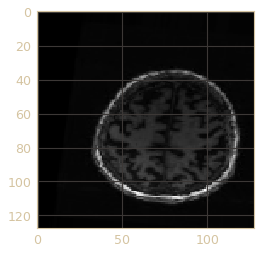

In [22]:
fnames = [os.path.join(train_MRI_dir, fname) for fname in os.listdir(train_MRI_dir)]

img_path = fnames[25]

img = image.load_img(img_path, target_size=(128, 128))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=15,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=15,
        class_mode='categorical')

history_da = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=30)

Found 250 images belonging to 3 classes.
Found 250 images belonging to 3 classes.
Epoch 1/10
50/50 [==============================] - 4s 76ms/step - loss: 0.7892 - acc: 0.5640 - val_loss: 0.3561 - val_acc: 0.9480
Epoch 2/10
50/50 [==============================] - 3s 67ms/step - loss: 0.4316 - acc: 0.8120 - val_loss: 0.1628 - val_acc: 0.9760
Epoch 3/10
50/50 [==============================] - 3s 64ms/step - loss: 0.3475 - acc: 0.8460 - val_loss: 0.7041 - val_acc: 0.6880
Epoch 4/10
50/50 [==============================] - 3s 63ms/step - loss: 0.2982 - acc: 0.8686 - val_loss: 0.0659 - val_acc: 0.9880
Epoch 5/10
50/50 [==============================] - 3s 68ms/step - loss: 0.2222 - acc: 0.9146 - val_loss: 0.0737 - val_acc: 0.9840
Epoch 6/10
50/50 [==============================] - 3s 64ms/step - loss: 0.1454 - acc: 0.9533 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 7/10
50/50 [==============================] - 7s 142ms/step - loss: 0.1245 - acc: 0.9613 - val_loss: 0.0087 - val_acc: 1.0000


In [25]:
model.save('model_data_aum.h5')

In [26]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=10,
    class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=30)
print('TEST LOSS: ', test_loss)
print('TEST_ACCURACY: ', test_acc)

Found 136 images belonging to 3 classes.
TEST LOSS:  0.0009218026165872786
TEST_ACCURACY:  1.0


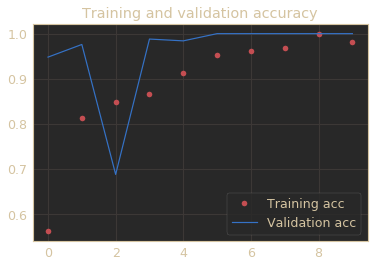

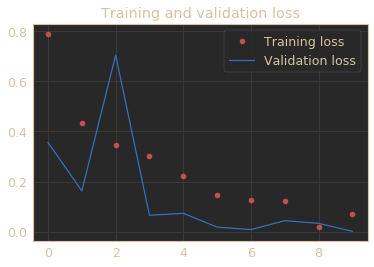

In [27]:
acc = history_da.history['acc']
val_acc = history_da.history['val_acc']
loss = history_da.history['loss']
val_loss = history_da.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', color='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo',color='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [37]:
img_path = '/home/matteolab/Documents/TesiMagistrale/MODELLI/CLASSIFICAZIONE_PET_CT_MRI_DATA/DataPython_jpg/CT30.jpg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)

img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(128, 128, 3)
(1, 128, 128, 3)


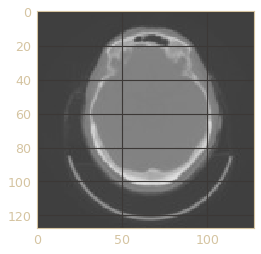

In [38]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [39]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [1]:
activations = activation_model.predict(img_tensor)

NameError: name 'activation_model' is not defined

In [41]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 126, 126, 32)


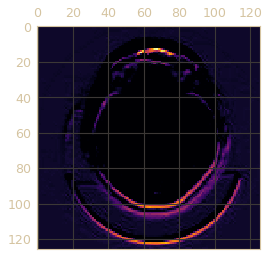

In [42]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='inferno')
plt.show()

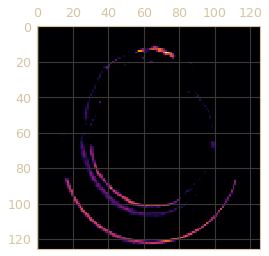

In [43]:
plt.matshow(first_layer_activation[0, :, :, 14], cmap='inferno')
plt.show()

/home/matteolab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


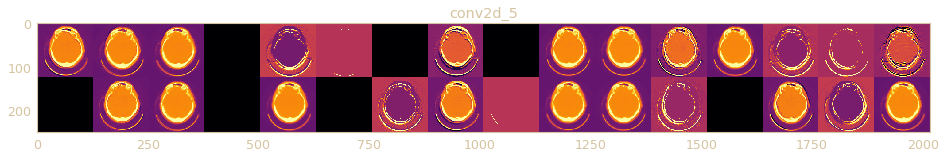

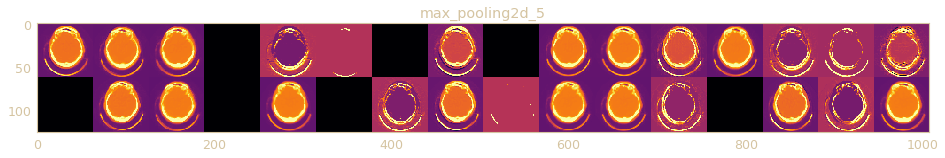

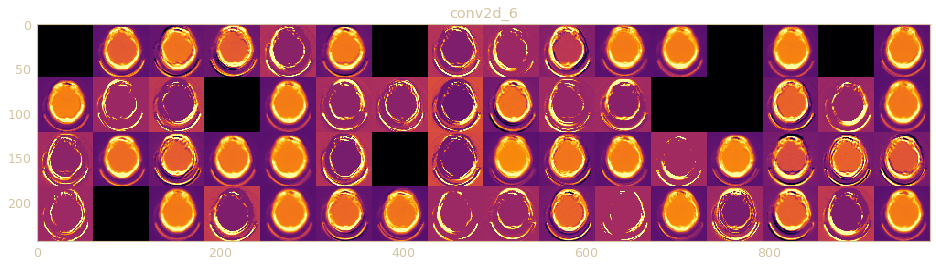

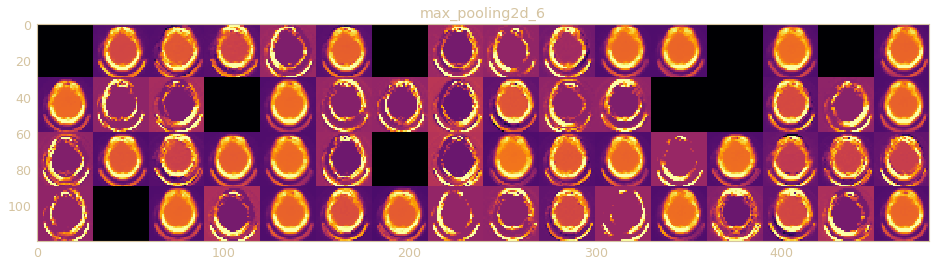

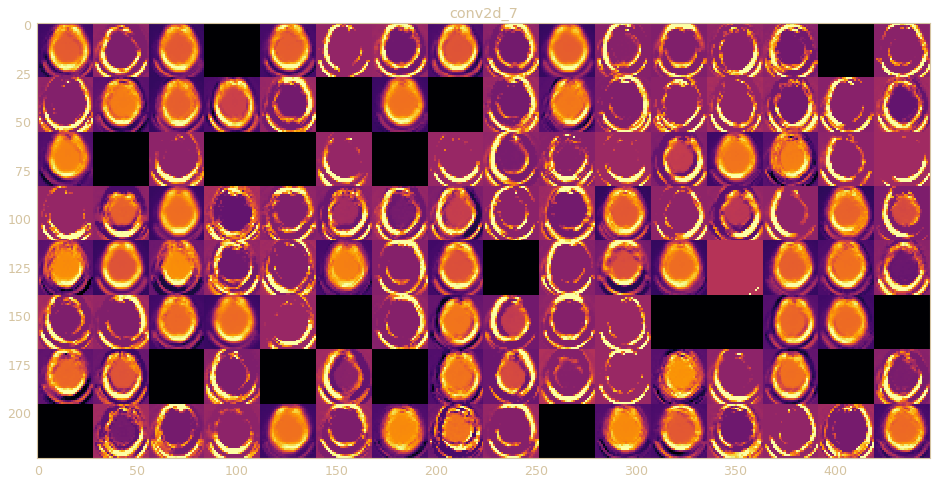

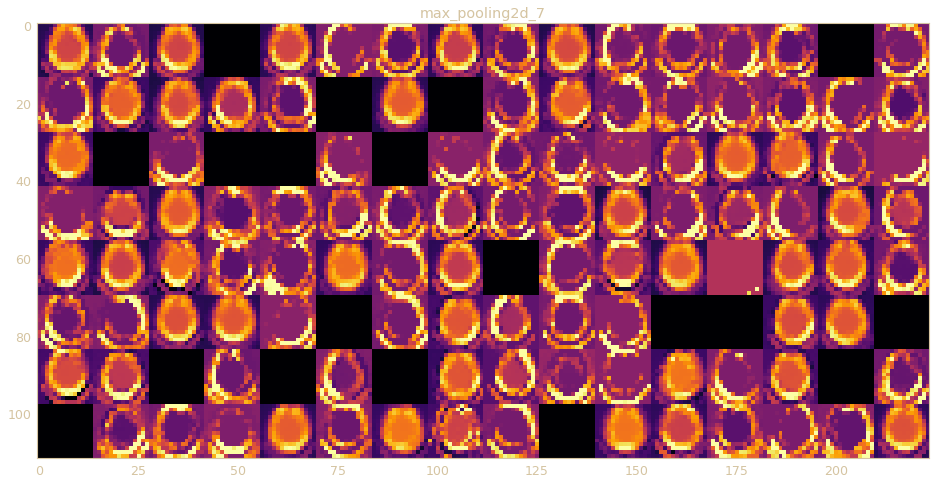

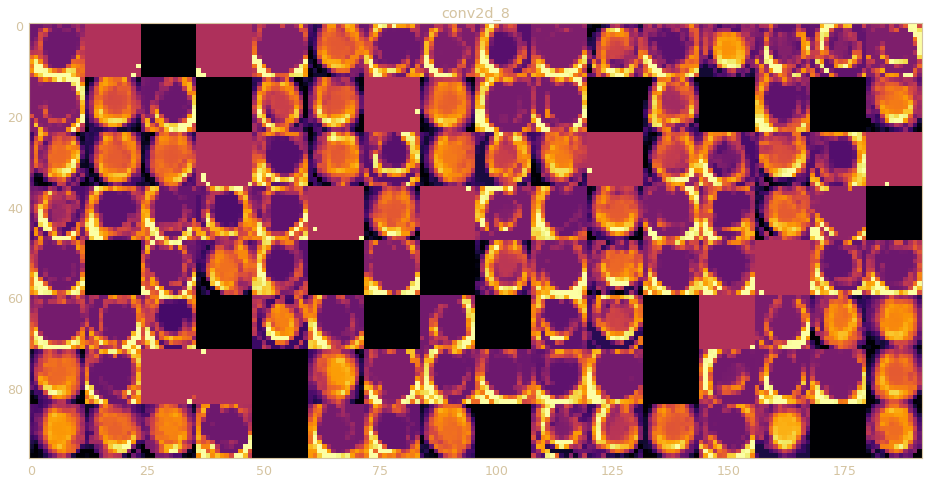

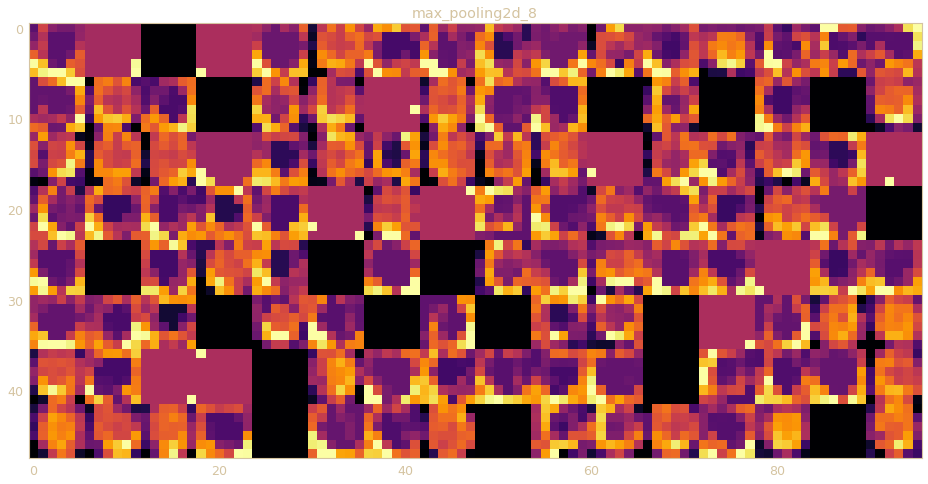

In [44]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    #print(display_grid.shape)
    
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='inferno')
    
plt.show()

In [45]:
#FILTRI

from keras.applications import VGG16
from keras import backend as K

layer_name = 'conv2d_5'
filter_index = 0

#ancora tutto da definire, solo definizioni!
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [46]:
grads = K.gradients(loss, model.input)[0]

In [47]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [48]:
iterate = K.function([model.input], [loss, grads])
#a iterate devo solo dare l'input

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [49]:
print(grads_value.shape)
print(loss_value)

(1, 150, 150, 3)
0.0


In [50]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 
#40 STEPS
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [51]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean() #centro a zero
    x /= (x.std() + 1e-5) 
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [52]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    #print(img.shape) #150 150 3
    return deprocess_image(img)

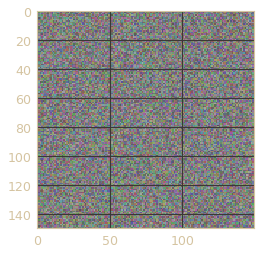

In [53]:
plt.imshow(generate_pattern('conv2d_5', 6))
plt.show()

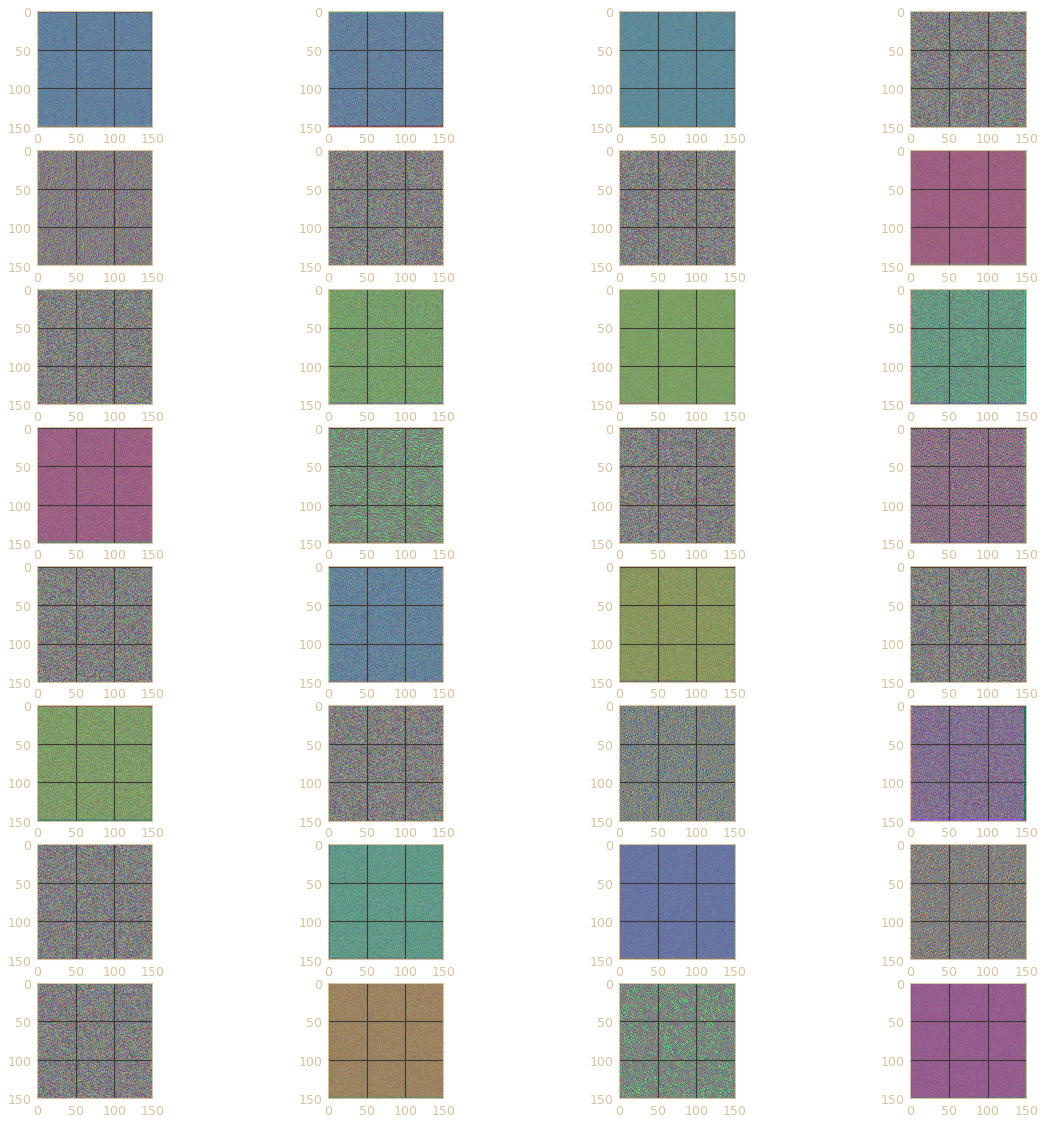

In [54]:
fig = plt.figure(figsize=(20,20))  

for i in range (0,32):
    
        sub = fig.add_subplot(8,4,i+1)
        sub.imshow(generate_pattern('conv2d_5', i))

In [ ]:
fig = plt.figure(figsize=(20,20))  

for i in range (0,32):

        sub = fig.add_subplot(8,4,i+1)
        sub.imshow(generate_pattern('conv2d_6', i))

In [ ]:
fig = plt.figure(figsize=(20,20))  

for i in range (0,32):

        sub = fig.add_subplot(8,4,i+1)
        sub.imshow(generate_pattern('conv2d_7', i))

In [ ]:
fig = plt.figure(figsize=(20,20))  

for i in range (0,32):

        sub = fig.add_subplot(8,4,i+1)
        sub.imshow(generate_pattern('conv2d_8', i))

In [ ]:
#FILTRO

model.summary()

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from keras import backend as K

# The local path to our target image
img_path = '/home/matteolab/Documents/TesiMagistrale/DEEPLEARNING/DEEPLEARNING_DB_CLASSIFICAZIONE_PET_CT_MRI/dati_elisabetta_jpg/PET115.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(128, 128))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# Remember that the model was trained on inputs
# that were preprocessed in the following way:



# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
#x = preprocess_input(x)
x=x/255.

import matplotlib.pyplot as plt
plt.imshow(x[0])
plt.show()

In [ ]:
preds = model.predict(x)
print('prediction:', preds)

preds.shape
output=model.output[:,0] #LA TAC, LA PET È 2 LA MRI È 1
last_conv_layer=model.get_layer('conv2d_8')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [ ]:
import cv2

# We use cv2 to load the original image
img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
#heatmap *= 255
#plt.show()

# We apply the heatmap to the original image
#heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap #+ img[:,:,0]

import matplotlib.pyplot as plt
plt.imshow(superimposed_img)
#plt.colorbar()
plt.show()


# Save the image to disk
cv2.imwrite('/home/matteolab/heat_map.jpg', superimposed_img)

import matplotlib.pyplot as plt
plt.imshow(x[0])
plt.show()